In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [21]:
penguins = sns.load_dataset('penguins')

In [22]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


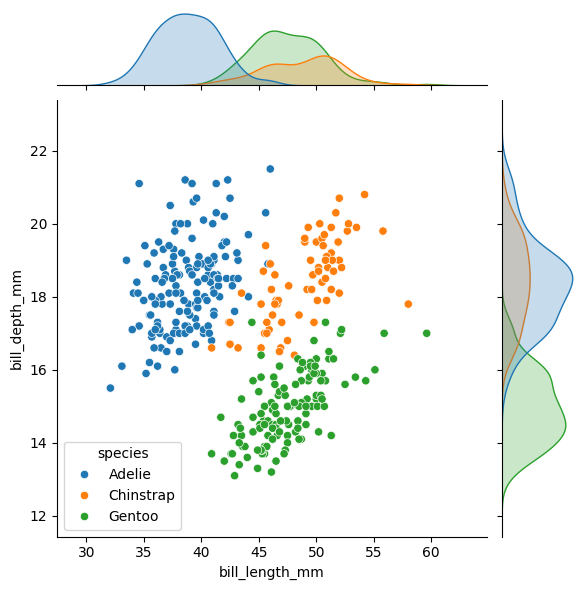

In [23]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

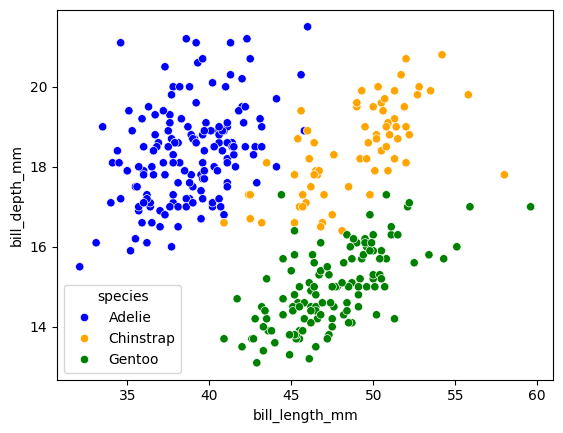

In [24]:
colors = {'Adelie': 'blue', 'Chinstrap': 'orange', 'Gentoo': 'green'}
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue="species", palette=colors)

In [25]:
# Chia bộ dữ liệu theo từng loài
adelie = penguins[penguins['species'] == 'Adelie']
chinstrap = penguins[penguins['species'] == 'Chinstrap']
gentoo = penguins[penguins['species'] == 'Gentoo']

In [26]:
# Điền giá trị thiếu bằng cách tính trung bình theo từng loài
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins[column] = penguins.groupby('species')[column].transform(lambda x: x.fillna(x.mean()))

In [27]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen       39.100000      18.700000         181.000000   
1    Adelie  Torgersen       39.500000      17.400000         186.000000   
2    Adelie  Torgersen       40.300000      18.000000         195.000000   
3    Adelie  Torgersen       38.791391      18.346358         189.953642   
4    Adelie  Torgersen       36.700000      19.300000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe       47.504878      14.982114         217.186992   
340  Gentoo     Biscoe       46.800000      14.300000         215.000000   
341  Gentoo     Biscoe       50.400000      15.700000         222.000000   
342  Gentoo     Biscoe       45.200000      14.800000         212.000000   
343  Gentoo     Biscoe       49.900000      16.100000         213.000000   

     body_mass_g     sex  
0    3750.000000    Male  
1    3800.000000  Female  
2    3

In [28]:
# Kiểm tra lại sau khi đã điền giá trị
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


In [29]:
# Hàm để điền giá trị giới tính ngẫu nhiên dựa trên tỷ lệ của từng loài
def fill_sex_randomly(df):
    male_ratio = df['sex'].value_counts(normalize=True).get('Male', 0)
    return np.random.choice(['Male', 'Female'], p=[male_ratio, 1 - male_ratio])

In [30]:
# Áp dụng cho từng loài
for species, group in penguins.groupby('species'):
    penguins.loc[(penguins['species'] == species) & (penguins['sex'].isnull()), 'sex'] = group.apply(lambda row: fill_sex_randomly(group), axis=1)

In [31]:
# Kiểm tra lại dữ liệu sau khi đã điền giá trị
print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [32]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen       39.100000      18.700000         181.000000   
1    Adelie  Torgersen       39.500000      17.400000         186.000000   
2    Adelie  Torgersen       40.300000      18.000000         195.000000   
3    Adelie  Torgersen       38.791391      18.346358         189.953642   
4    Adelie  Torgersen       36.700000      19.300000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe       47.504878      14.982114         217.186992   
340  Gentoo     Biscoe       46.800000      14.300000         215.000000   
341  Gentoo     Biscoe       50.400000      15.700000         222.000000   
342  Gentoo     Biscoe       45.200000      14.800000         212.000000   
343  Gentoo     Biscoe       49.900000      16.100000         213.000000   

     body_mass_g     sex  
0    3750.000000    Male  
1    3800.000000  Female  
2    3

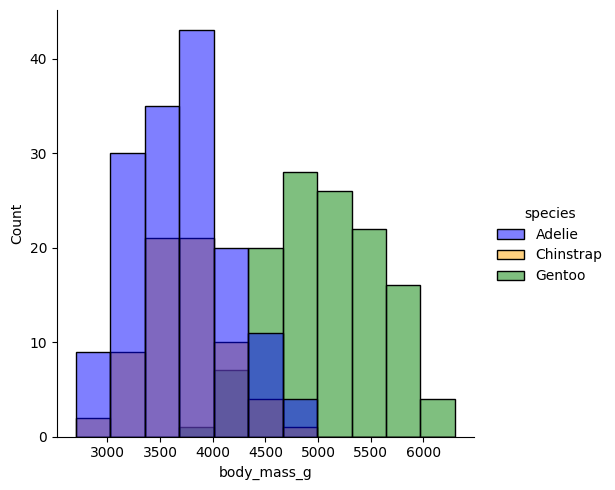

In [33]:
sns.displot(data=penguins, x='body_mass_g', hue='species', palette=colors)

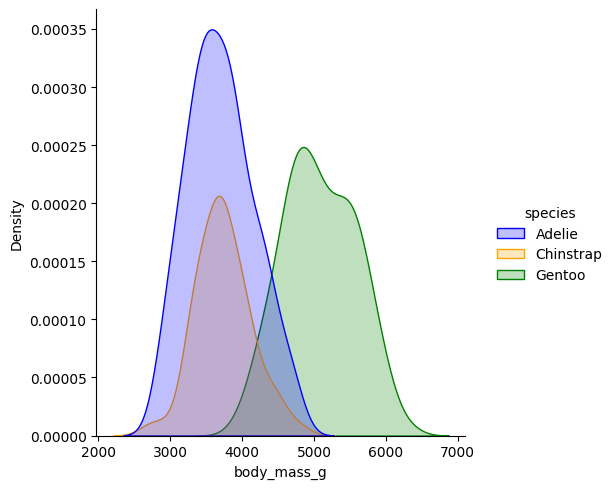

In [34]:
sns.displot(data=penguins, x='body_mass_g', palette=colors, kind='kde', hue="species", fill=True)
# According to the below plot, Gentoo tends to be heavier than Adelie and Chinstrap

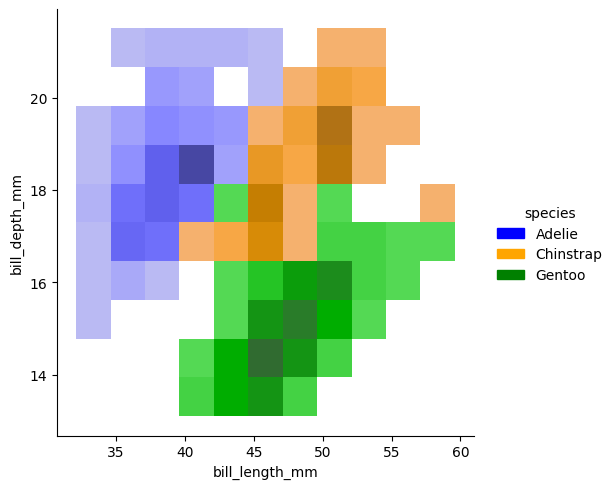

In [35]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', palette=colors, hue="species")
# According to the below plot, Gentoo tends to have smaller bill_depth than other species
# Adelie tends to have shorter bill than Chinstrap and Gentoo

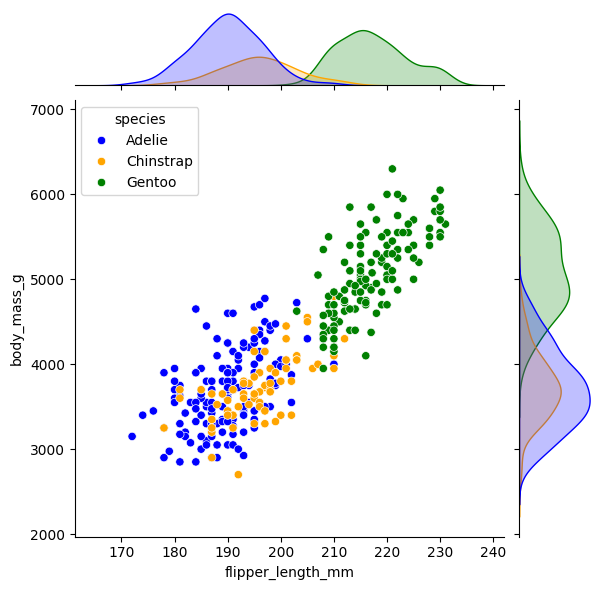

In [36]:
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)
# According to the below plot, Gentoo tends to have longer flipper and greater weight than Adelie and Chinstrap

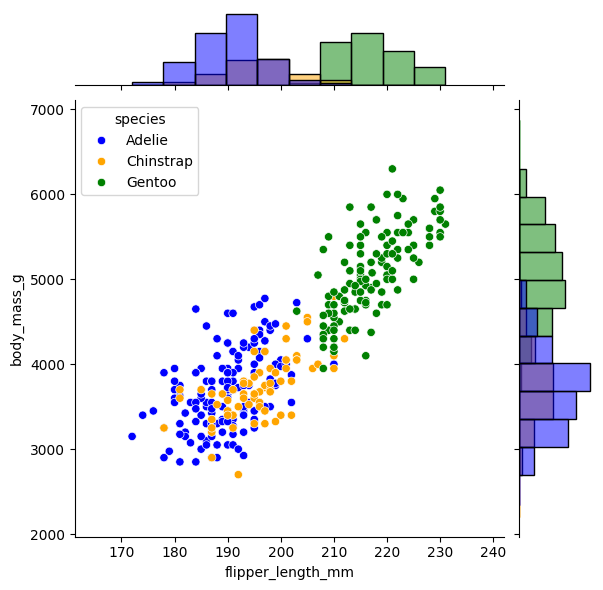

In [37]:
peng_plt = sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)
peng_plt.plot_marginals(sns.histplot)

<Axes: >

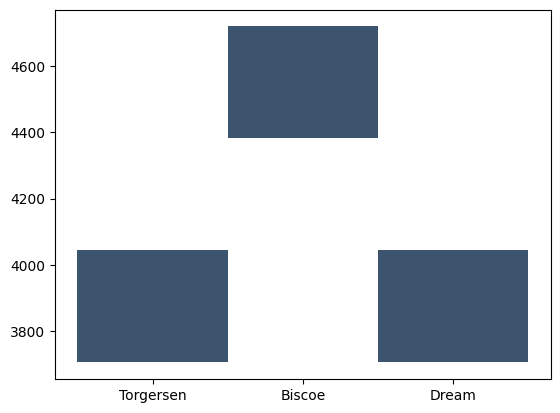

In [38]:
mw_Torgersen = penguins.loc[penguins['island'] == 'Torgersen', 'body_mass_g'].mean()
mw_Biscoe = penguins.loc[penguins['island'] == 'Biscoe', 'body_mass_g'].mean()
mw_Dream = penguins.loc[penguins['island'] == 'Dream', 'body_mass_g'].mean()
mean_weight = [mw_Torgersen, mw_Biscoe, mw_Dream]
island = ['Torgersen', 'Biscoe', 'Dream']
sns.histplot(x=island, y=mean_weight)
# According to the below plot, penguins inhabiting Biscoe tend to have greater body mass than those living in Torgersen and Dream

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

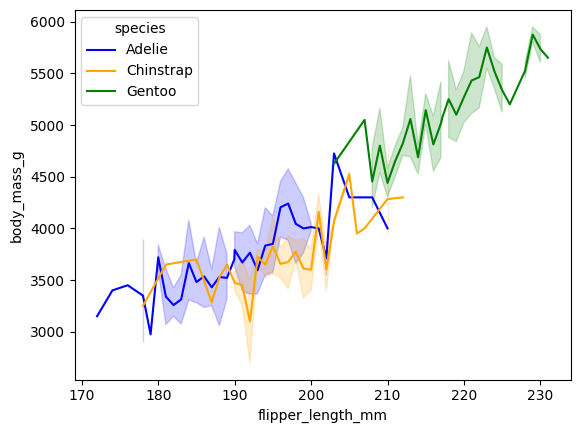

In [39]:
# A more transparent way to observe the supremacy of Gentoo over other species when measuring flipper and weight
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette=colors)

In [40]:
# y corresponds to target_names
list_of_penguins = [i for i in penguins['species']]
for i in range(len(list_of_penguins)):
  if list_of_penguins[i]=='Adelie':
    list_of_penguins[i] = 1
  elif list_of_penguins[i]=='Chinstrap':
    list_of_penguins[i] = 2
  else:
    list_of_penguins[i] = 3
y = np.array(list_of_penguins)

In [41]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [42]:
# target_names
target_names = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
target_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9')

In [43]:
# feature_names
feature_names = ['island', 'bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
feature_names

['island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [44]:
X = penguins.to_dict('split')['data']
for i in range(len(X)):
  X[i] = X[i][1:6]
  if X[i][0] == 'Torgersen':
    X[i][0] = 0
  elif X[i][0] == 'Biscoe':
    X[i][0] = 1
  else:
    X[i][0] = 2
X = np.array(X)

In [45]:
X

array([[0.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03],
       [0.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03],
       [0.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03],
       ...,
       [1.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03],
       [1.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03],
       [1.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03]])

In [46]:
# Chia dữ liệu thành tập train và test với tỷ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23520453)

# Kiểm tra kích thước của tập train và test
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(258, 5)
(86, 5)
(258,)
(86,)


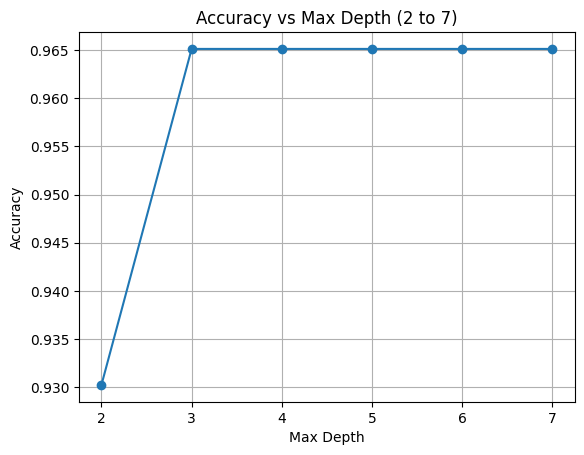

In [57]:
# We examine max_depth from 2 to 7
model = [DecisionTreeClassifier(max_depth=i, random_state=23520453).fit(X_train, y_train) for i in range(2, 8)]
arr_max_depth = np.linspace(2, 7, 6)
arr_max_depth
arr_accuracy = np.array([model[i].score(X_test, y_test) for i in range(len(model))])
import matplotlib.pyplot as plt
# Vẽ đồ thị độ sâu vs. độ chính xác
plt.plot(arr_max_depth, arr_accuracy, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth (2 to 7)')
plt.grid(True)
plt.show()

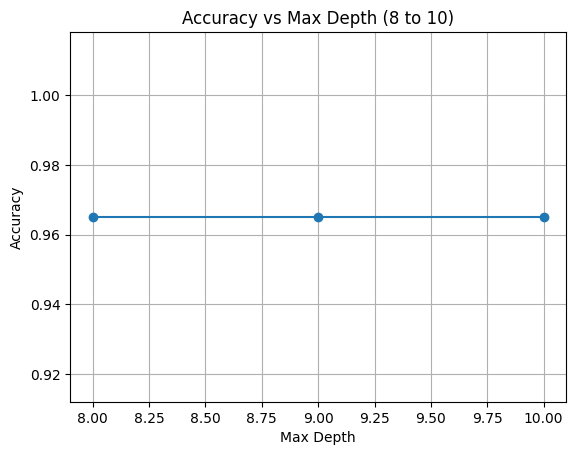

In [53]:
# Huấn luyện các mô hình với max_depth từ 8 đến 10
model = [DecisionTreeClassifier(max_depth=i, random_state=23520453).fit(X_train, y_train) for i in range(8, 11)]

# Tạo mảng độ sâu
arr_max_depth = np.arange(8, 11)  # Chỉ các giá trị max_depth từ 8 đến 10

# Tính độ chính xác trên tập test cho từng mô hình
arr_accuracy = np.array([model[i-8].score(X_test, y_test) for i in arr_max_depth])

# Vẽ đồ thị độ sâu vs. độ chính xác
plt.plot(arr_max_depth, arr_accuracy, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth (8 to 10)')
plt.grid(True)
plt.show()

In [54]:
from graphviz import Source
from sklearn.tree import export_graphviz

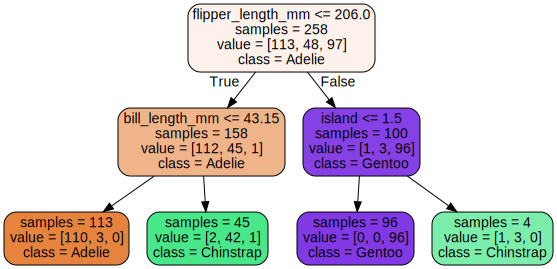

In [55]:
# Drawing tree with max_depth = 2

tree = DecisionTreeClassifier(max_depth=2, random_state=23520453)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file='penguins.dot', feature_names=feature_names, class_names=target_names, impurity=False, filled=True, rounded=True)
Source.from_file('penguins.dot')

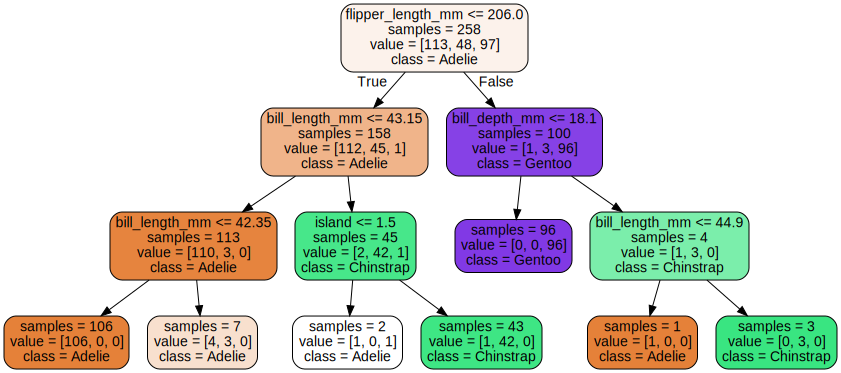

In [56]:
# Drawing tree with max_depth = 3

tree = DecisionTreeClassifier(max_depth=3, random_state=23520453)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file='penguins.dot', feature_names=feature_names, class_names=target_names, impurity=False,filled=True, rounded=True)
Source.from_file('penguins.dot')